<a href="https://colab.research.google.com/github/jatinsharma16/Capstone-Project-Classification/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Cardiovascular Risk Prediction**

Project type: Classification

Contribution: Individual

#**GITHUB LINK**

Github link: https://github.com/jatinsharma16/Capstone-Project-Classification

#**PROBLEM STATEMENT**

<h2> Problem overview

The cardiovascular risk prediction is really important for any patient who might get affected due to this problem, therefore it becomes a major concern to detect the risk before hand so as to provide suitable treatment to the patient and prevent any major problem.

The data that we are provided is from an ongoing study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides with the patients' information. It includes over 3,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

To prevent the patient from any major problem, it becomes a priority to detect any problem and to tackle the same before it is too late to take any action which in turn helps the doctors or the hospitals to reduce the mortality rate and provide a better treatment to the patient. This helps hospitals to build a good relation with the patients and many lives are also saved. 

Making better relations with the patients result in better patient-doctor interactions which helps the hospital to grow as more consistent patients are there and helps the business achieve new heights making their patients a family.



#**PROJECT STARTS HERE**

### Knowing the data

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting the drive for some security reason so that no one can access the data of the file.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Defining the path of the csv file and reading the content of the file
path = "/content/drive/MyDrive/Almabetter/Modules/Machine_Learning/Classification_Capstone_project/data_cardiovascular_risk.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


The above data shows that our dataset has 3390 records.

In [6]:
df.shape

(3390, 17)

Basically, the dataset contains 3390 records of different patients and the number of columns present in the dataset are 17, out of which one would be our target column i.e. the dependent variable and one is the 'id' column which won't be any help for the model training. Therefore we have 15 independent variables on which we will be training our model.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.describe().shape

(8, 15)

Out of 17 columns, the dataset contains 15 columns with numerical data although many of them are categorical variables.

In [10]:
# lets see all the columns present in the dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<h1> Column Description

- **id**: The id of the patients.
- **age**: The age of the patient.
- **education**: education of the patient.
- **sex**: male or female (M/F).
- **is_smoking**: whether the patient smoke or not (Yes/No).
- **cigsPerDay**: the number of cigarettes that the patient on an average smokes per day.
- **BPMeds**: Whether the patient is taking BP medicines.
- **prevalentStroke**: Whether the patient has any stroke history.
- **prevalentHyp**: Whether the patient has problem of hypertension.
- **diabetes**: Whether the patient has diabetes.
- **totChol**: total cholestrol level of the patient.
- **sysBP**: Systolic blood pressure of the patient.
- **diaBP**: Diastolic blood pressure of the patient.
- **BMI**: Body mass index of the patient.
- **heartRate**: The heart rate of the patient per minute.
- **glucose**: Glucose level of the patient.
- **TenYearCHD**: 10-year risk of coronary heart disease. (Dependent variable)

### Handling Duplicate values

In [11]:
# Checking for duplicates
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


As we can see that there are no duplicate values present in the dataset, therefore now lets check the null values.

### Handling NULL values

In [12]:
# Checking for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Since there are missing values present, therefore we'll first substitute the missing values with appropriate values and then start the EDA part.

#### Education

In [13]:
# Handling the missing values present in education column
df['education'].describe()

count    3303.000000
mean        1.970936
std         1.019081
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [14]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

As we can see that education is not a continuous variable therefore we'll be using Mode to fill the missing values.

In [15]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

#### cigsPerDay

In [16]:
# Moving to the next column cigsPerDay
df['cigsPerDay'].describe()

count    3368.000000
mean        9.069477
std        11.879078
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [17]:
df['cigsPerDay'].unique()

array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
       43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
       14., 16., 23., 13., 12., 70., 38.])

Since the cigsPerDay is a numerical continuous column therefore we'll use median to fill the null values.

In [18]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

#### BPMeds

In [19]:
# Moving to the third column with missing values that is BPmeds
df['BPMeds'].describe()

count    3346.000000
mean        0.029886
std         0.170299
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: BPMeds, dtype: float64

In [20]:
df['BPMeds'].unique()

array([ 0., nan,  1.])

Since BPMeds is a categorical column therefore we'll use mode to fill the missing values.

In [21]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

#### totChol

In [22]:
# the next column with null values are totChol
df['totChol'].describe()

count    3352.000000
mean      237.074284
std        45.247430
min       107.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       696.000000
Name: totChol, dtype: float64

In [23]:
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

Since the totChol is a continuous variable therefore using median to fill the missing values.

In [24]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

#### BMI

In [25]:
# The next column is the BMI
df['BMI'].describe()

count    3376.000000
mean       25.794964
std         4.115449
min        15.960000
25%        23.020000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [26]:
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

Here we can see that BMI is also a continuous variable therefore we'll use median to fill the null values.

In [27]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

#### heartRate

In [28]:
# the second last column with null values is the heartrate
df['heartRate'].describe()

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [29]:
df['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

Since it is a continuous variable therefore using median to fill the missing values.

In [30]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

#### glucose

In [31]:
# the last column which holds some missing values is glucose
df['glucose'].describe()

count    3086.000000
mean       82.086520
std        24.244753
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [32]:
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

Glucose is also a continuous varible therefore we'll be using median to fill the null values.

In [33]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [34]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

So, now we have done the data cleaning part and now the dataset do not have any duplicate values or any null values therefore now we can move to the next step that is the Exploratory Data Analysis part.

## Exploratory Data Analysis

### boxplots

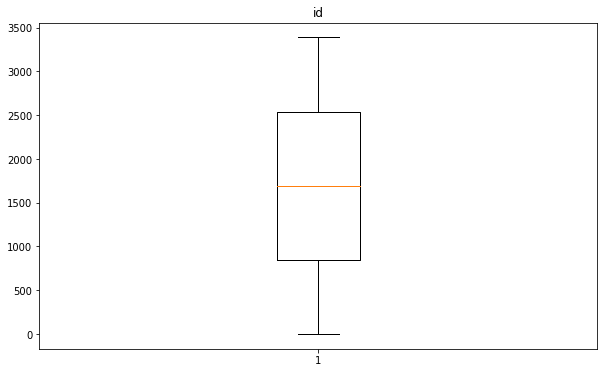

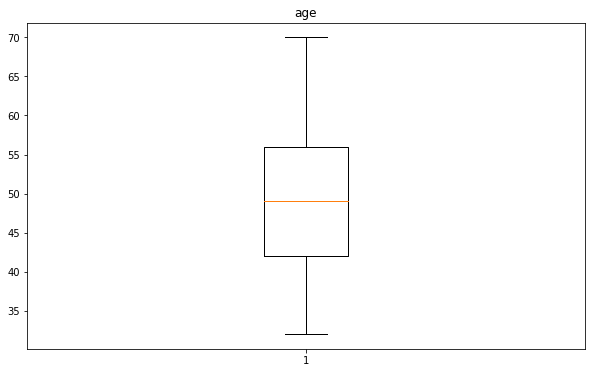

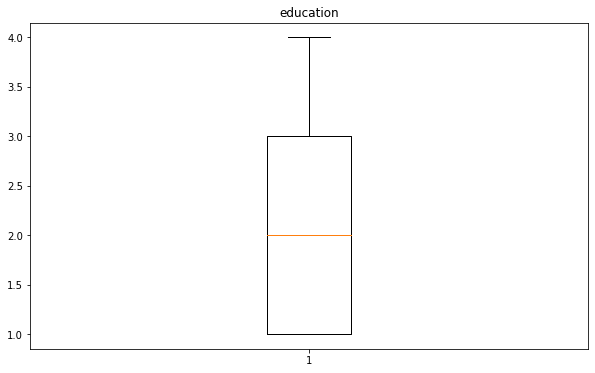

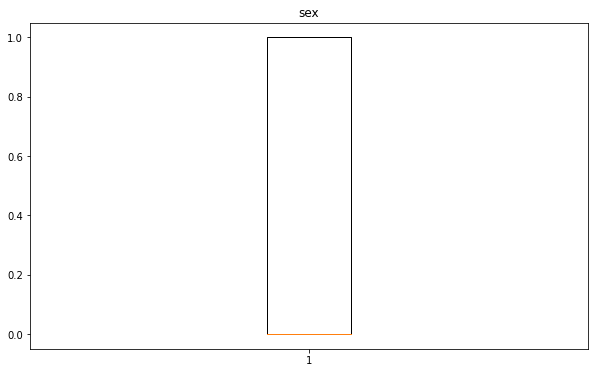

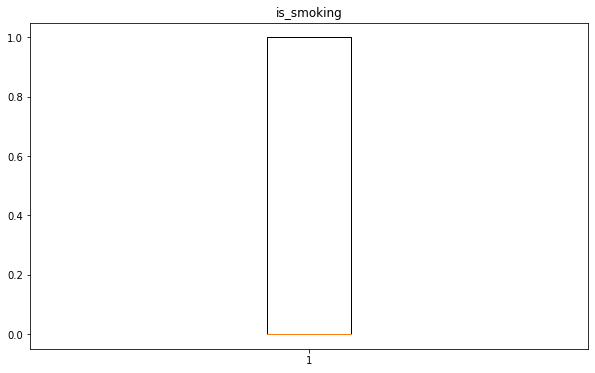

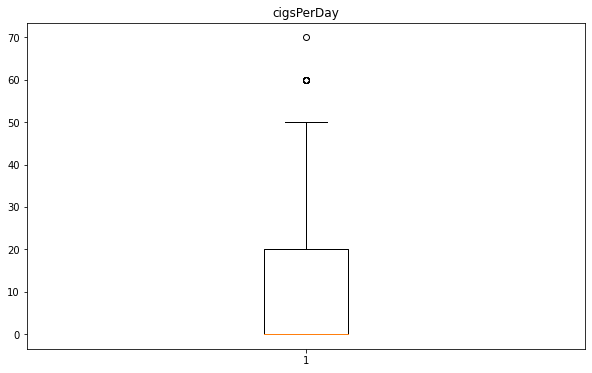

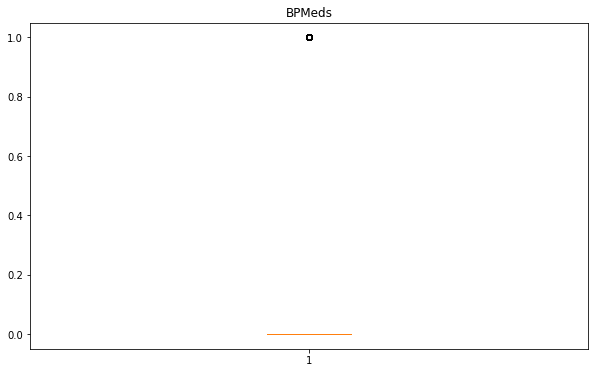

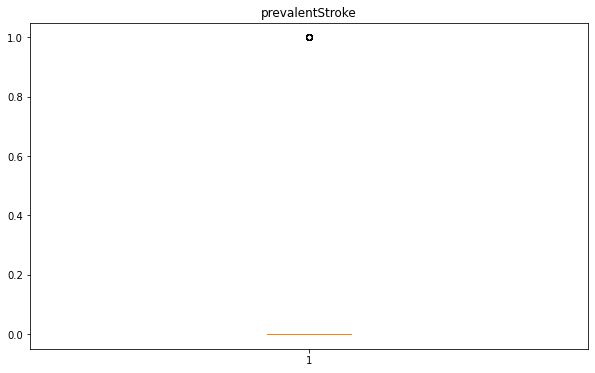

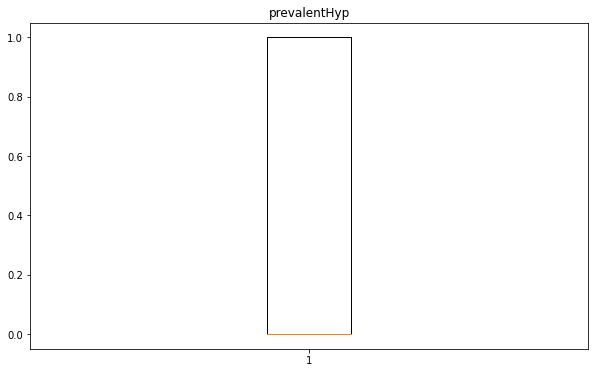

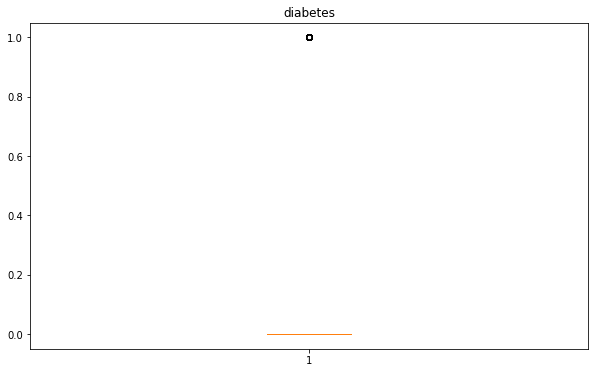

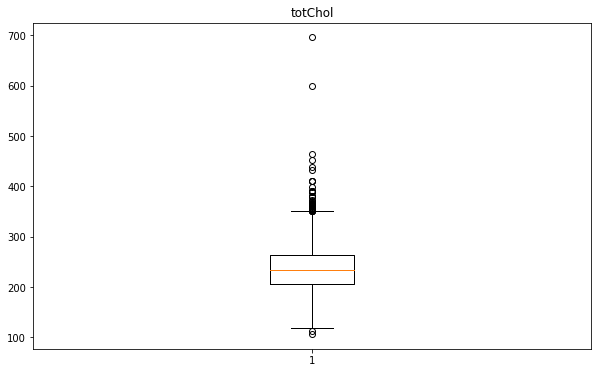

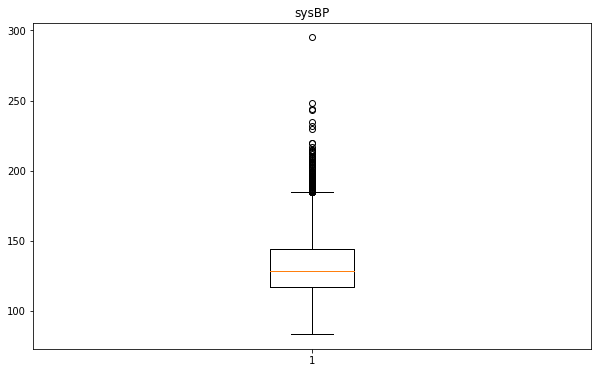

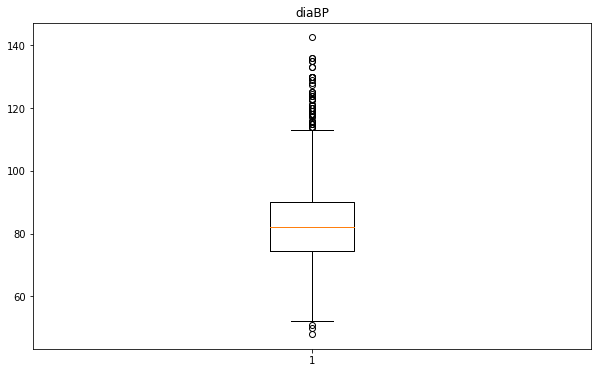

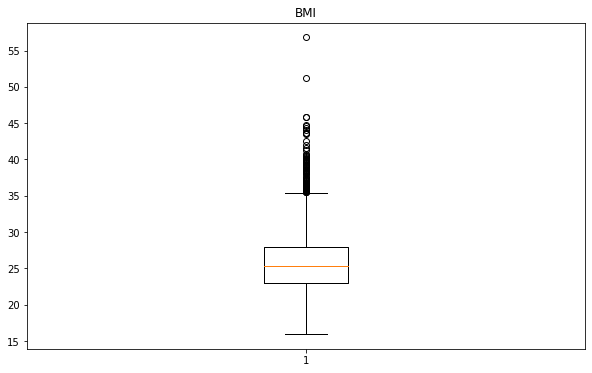

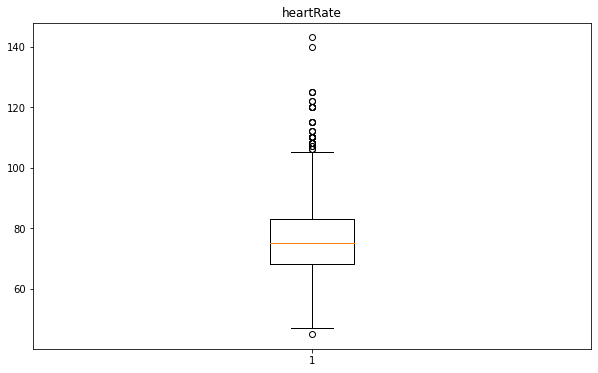

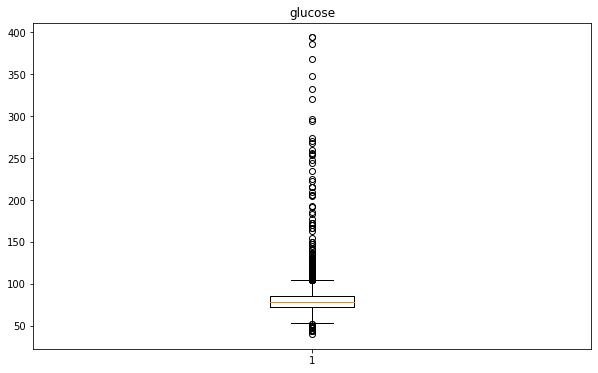

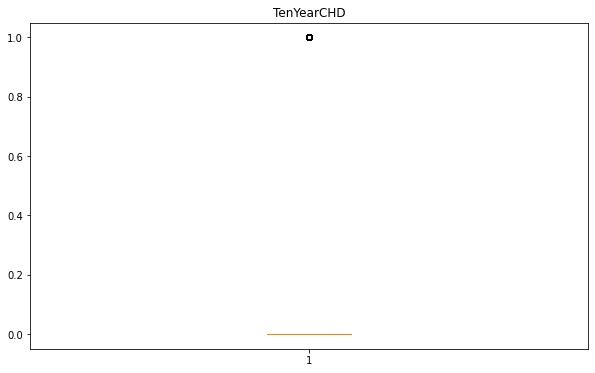

In [88]:
numeric_col = df.describe().columns

for col in numeric_col:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    plt.boxplot(df[col])
    ax.set_title(col)

plt.show()

- Used the box plots to see whether any outliers are present in the data or not.
- No big outliers are present in the values, although we will use the robust scaler at the time of data preparation which will use the IQR method to remove the outliers.

### Paired bar graph method

In [89]:
# Method to create a paired bar plot to see the ratio of total peoples to the people who are affected.

def pair_plot(df, col):
  plt.rcParams['figure.figsize'] = (12,6)
  df.groupby([col, 'TenYearCHD'])['id'].count().unstack().plot(kind = 'bar')
  plt.title('Effect of '+col)
  plt.show()

### Pie Chart method

In [90]:
# We will use this method to create pie chart for the columns that hold binary values like 0 & 1.

def pie_chart(df, col, label1, label2):
  plt.rcParams['figure.figsize'] = (8,5)
  plt.pie(df.groupby(col)['id'].count(),
          labels=[label1, label2],
          explode = [0.1,0.1],
          startangle = 90,
          autopct = '%1.1f%%')
  plt.title('Impact of '+ col)
  plt.show()

### Risk ratio

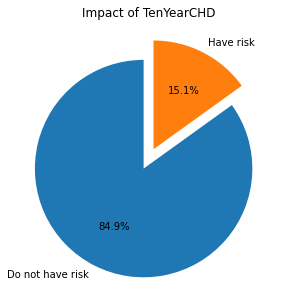

In [91]:
pie_chart(df, 'TenYearCHD', 'Do not have risk', 'Have risk')

- Used pie chart to see the ratio of patients that are affedted by the CHD risk out of all the patients.
- The chart shows that only 15% patients are affected by the CHD risk.

### age analysis

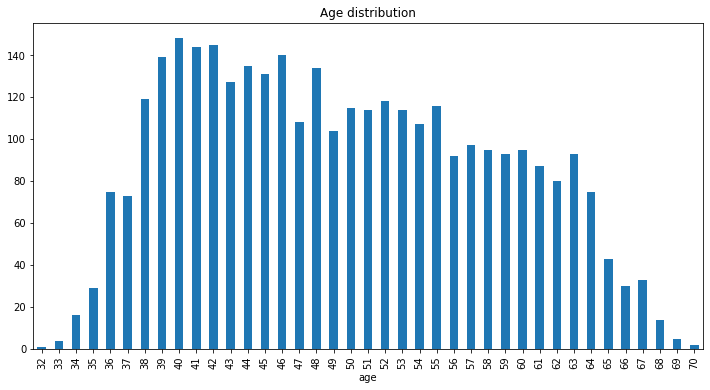

In [92]:
plt.rcParams['figure.figsize'] = (12,6)
df.groupby('age')['id'].count().plot(kind = 'bar')
plt.title('Age distribution')
plt.show()

- Using bar plot to see what is the amount of patients present in the dataset and their age groups.
- the graph shows that we have records of people aging from 32 to 70.

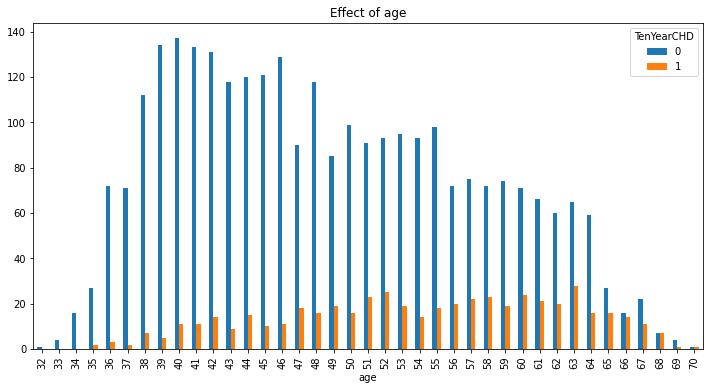

In [93]:
pair_plot(df, 'age')

- We used this chart to see how many people are there in each age group and what is the ratio of the people that are affected by the CHD.
- The graph shows that people from 35 age are vulnerable to CHD.

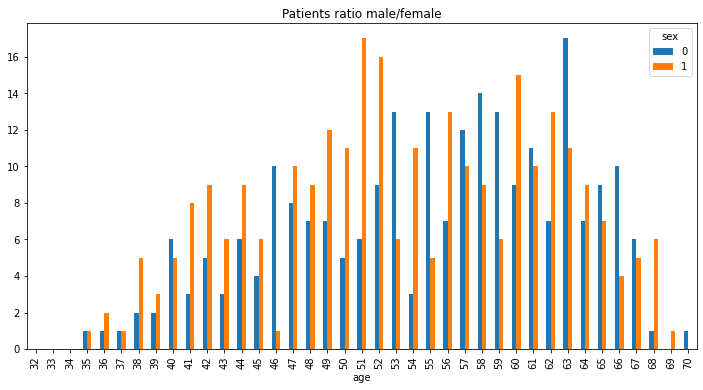

In [94]:
plt.rcParams['figure.figsize'] = (12,6)
df.groupby(['age', 'sex'])['TenYearCHD'].sum().unstack().plot(kind = 'bar')
plt.title('Patients ratio male/female')
plt.show()

- Used this graph to see the ratio between the male and female that are affected by the CHD.
- We can observe that more number of males are affected by the CHD at most ages.

### sex analysis

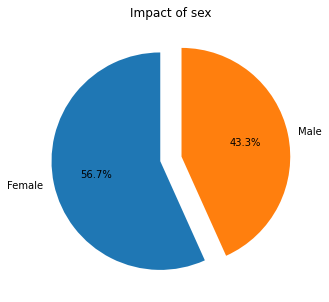

In [95]:
pie_chart(df, 'sex', 'Female', 'Male')

- Used this graph to see the ratio of records present in the dataset w.r.t. the sex of the patient.
- We have 56.7% female patients where as 43.3% patients are male.

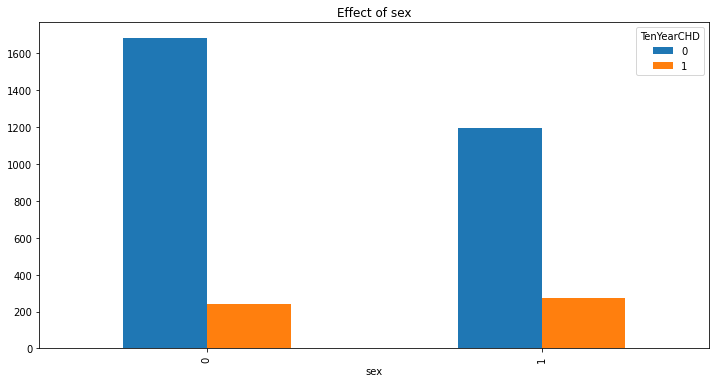

In [96]:
pair_plot(df, 'sex')

In [97]:
df.groupby(['sex','TenYearCHD'])['id'].sum()

sex  TenYearCHD
0    0             2849813
     1              407060
1    0             2016942
     1              470540
Name: id, dtype: int64

- Used the graph to see the ratio of total patients and the patients which are affected by the CHD.
- The above graph along with the data shows that although more female patients are there yet more number of male patients have the problem of CHD.

### Education analysis

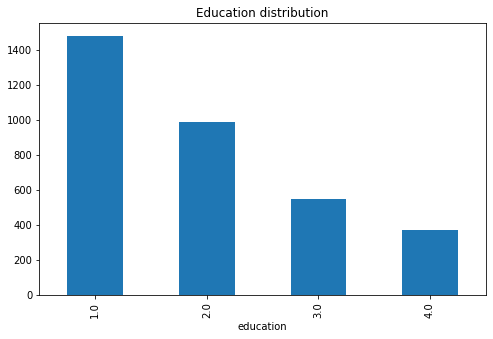

In [98]:
plt.rcParams['figure.figsize'] = (8,5)
df.groupby('education')['id'].count().plot(kind = 'bar')
plt.title('Education distribution')
plt.show()

- Used the bar graph to see the distribution of education among the patients.
- The bar graph shows that the level of education shows a decline from 1 to 4.

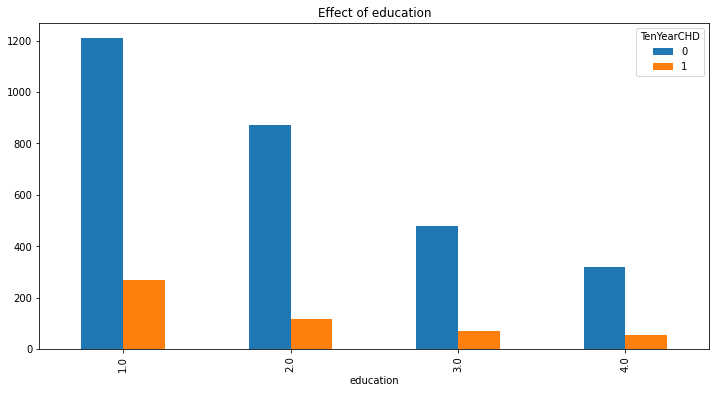

In [99]:
pair_plot(df, 'education')

- Used paired bar chart to see the ratio of all patients and patients affected with CHD w.r.t. education.
- The graph shows that there is no significant data to show that patient with higher education are less affected by the CHD.

### is_smoking analysis

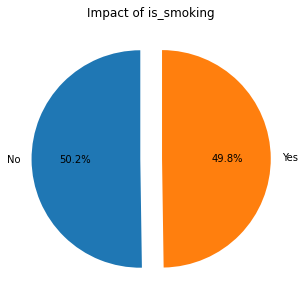

In [100]:
pie_chart(df, 'is_smoking', 'No', 'Yes')

In [101]:
df.groupby('is_smoking')['id'].count()

is_smoking
0    1703
1    1687
Name: id, dtype: int64

- We used pie chart to see the ratio of the patients who smoke to the patients who don't smoke.
- the graph and the data shows that the ratio is almost 50%.

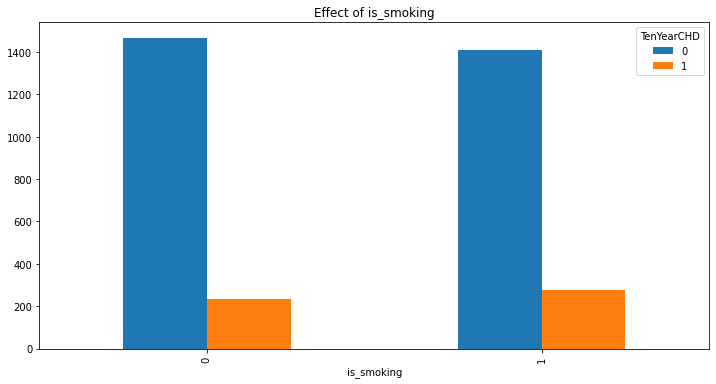

In [102]:
pair_plot(df, 'is_smoking')

- Used this graph to see the out of total persons who smoke and who do not smoke, how many are affected by CHD.
- The graph shows that smoking do not have any significant effect on the risk of CHD. 

### cigsPerDay analysis

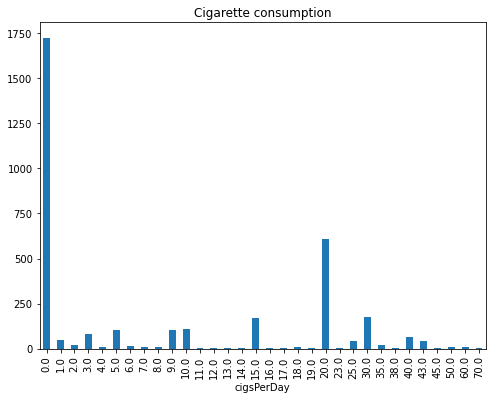

In [103]:
plt.rcParams['figure.figsize'] = (8,6)
df.groupby('cigsPerDay')['id'].count().plot(kind='bar')
plt.title('Cigarette consumption')
plt.show()

- Used bar graph to see what is the division of patients who are smoking on the basis of cigarettes per day.
- The graph shows that out of those who take cigarettes, the max quantity of cigarettes consumed per day is 20.

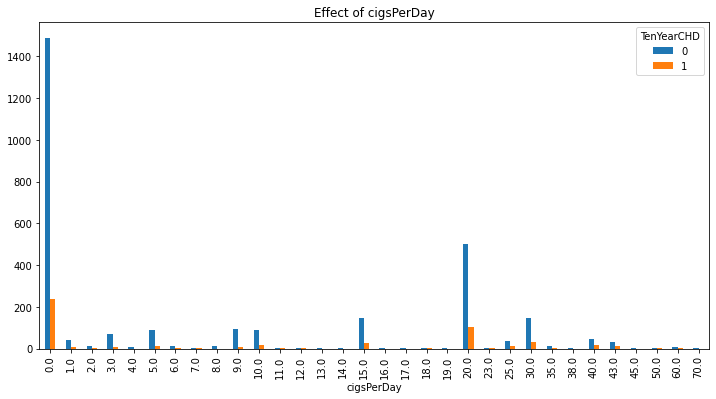

In [104]:
pair_plot(df, 'cigsPerDay')

- Used a paired bar plot to see the ratio of people taking cigarettes to those that are affected by the CHD risk.
- the graph shows that the number of cigarettes and its affect do not have any linear trend.

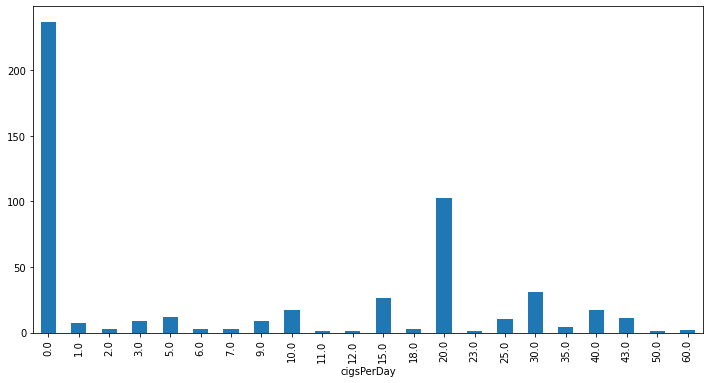

In [105]:
df[df['TenYearCHD'] == 1].groupby('cigsPerDay')['id'].count().plot(kind = 'bar')
plt.show()

- Used a bar plot to see what is the number of patients affected by the CHD risk and what is the count of daily cigarettes for them.
- The number of daily cigarettes do not have any direct impact on the CHD risk.

### BPMeds analysis

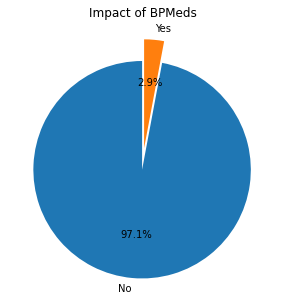

In [106]:
pie_chart(df, 'BPMeds', 'No', 'Yes')

- Used pie chart to see the ratio of people taking the BP meds out of all the people.
- The graph shows that 97.1% patients do not take any medication.

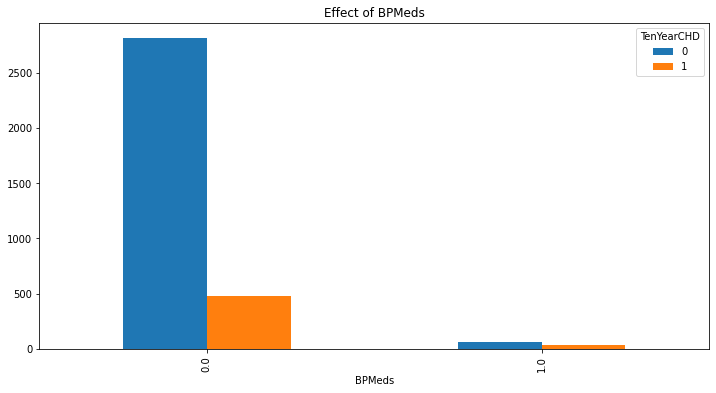

In [107]:
pair_plot(df, 'BPMeds')

- Used paired bar plot to see what effect does taking BP medicines have on the CHD risk.
- The graph shows that taking the medicines do not prevent the risk of CHD completely.

### prevalentStroke analysis

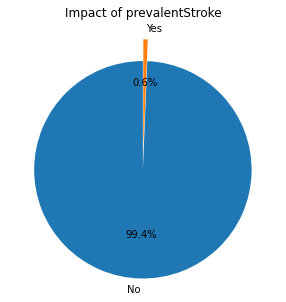

In [108]:
pie_chart(df, 'prevalentStroke', 'No', 'Yes')

- Used pie chart to see the percentage of people having a stroke history.
- The graph shows that only 0.6% people have a history of stroke

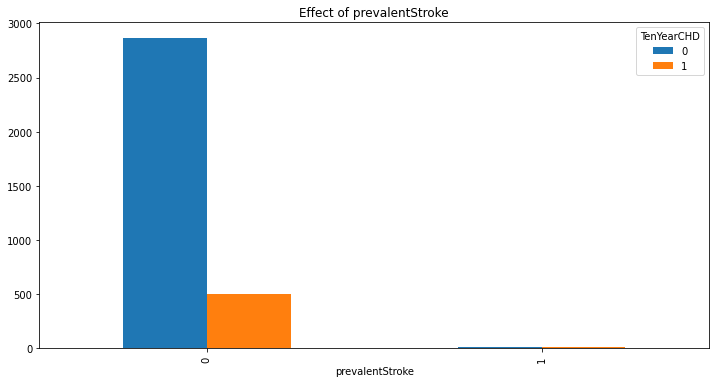

In [109]:
pair_plot(df, 'prevalentStroke')

In [110]:
df.groupby(['prevalentStroke','TenYearCHD'])['id'].count()

prevalentStroke  TenYearCHD
0                0             2867
                 1              501
1                0               12
                 1               10
Name: id, dtype: int64

- Used paired bar graph and table to see what effect does stroke have on CHD risk.
- Although there are only 22 records with stroke but out of those 22, 10 people have CHD risk.

### prevalentHypertension analysis

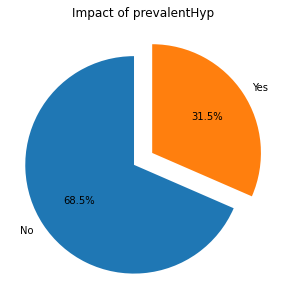

In [111]:
pie_chart(df, 'prevalentHyp', 'No', 'Yes')

- Used pie chart to see the ratio of patient having hypertension to the patient who don't have hypertension.
- The graph shows that 31.5% of the total patients have the problem of hypertension.

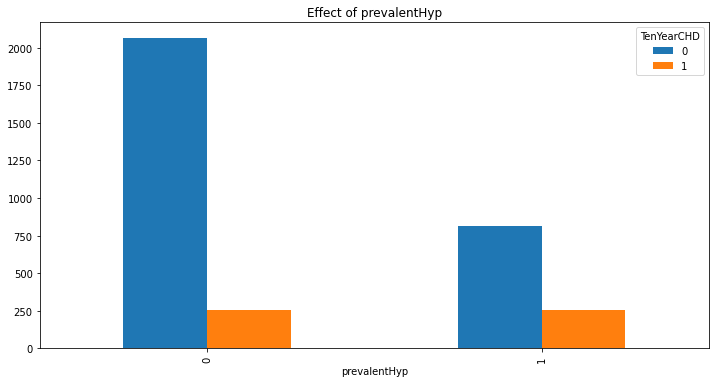

In [112]:
pair_plot(df, 'prevalentHyp')

- Used the paired bar graph because we wanted to see the effect of hypertension on CHD risk.
- The graph seems to show that Hypertension have a little impact on the CHD risk as the ratio of people having hypertension and CHD risk is more than that of people not having hypertension and CHD risk.

### Dibetes analysis

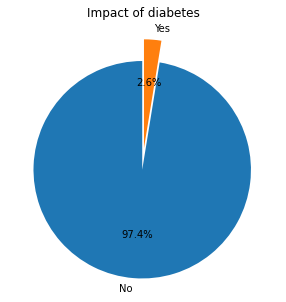

In [113]:
pie_chart(df, 'diabetes', 'No', 'Yes')

- Used pie chart to see the ratio of people having diabetes.
- Only 2.6% of people have a record of diabetes.

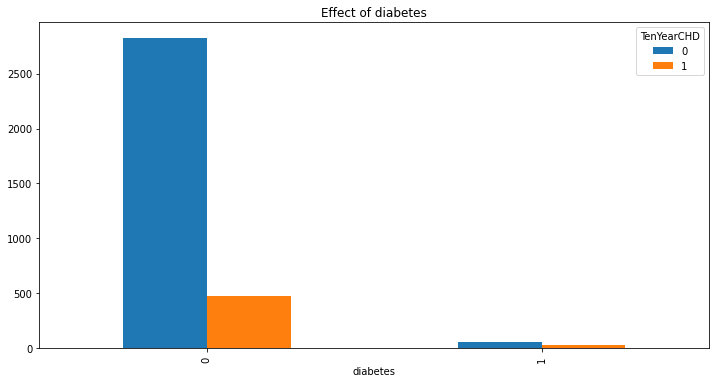

In [114]:
pair_plot(df, 'diabetes')

- Used paired bar graph to see the ratio of people which do not have diabetes but have CHD risk to the people having both.
- The graph shows that diabetes has a very small contribution in the CHD risk.

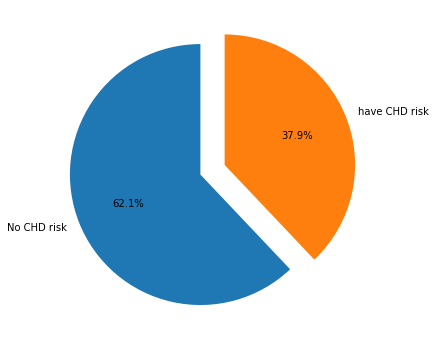

In [115]:
plt.pie(df[df['diabetes'] == 1].groupby('TenYearCHD')['id'].count(),
         labels=['No CHD risk','have CHD risk'],
        explode = [0.1,0.1],
        startangle = 90,
        autopct = '%1.1f%%')
plt.show()

- Used pie chart to see the ratio of people having diabetes and CHD risk to the people having diabetes and not having CHD risk, which wasn't clearly visible in the last graph.
- Almost 38% people having diabetes have a risk of CHD.

### line plot method

In [116]:
def line_chart(df, col):  
  fig, ax = plt.subplots(1,2,figsize=(8,6))
  ax1 = plt.subplot(1,2,1)
  plt.plot(df[df['TenYearCHD'] == 1].groupby(col)['id'].count())
  plt.title('People affected by CHD risk')
  plt.xlabel(col)
  plt.ylabel('Count of patient')

  ax2 = plt.subplot(1,2,2)
  plt.plot(df[df['TenYearCHD'] == 0].groupby(col)['id'].count())
  plt.title('People not affected by CHD risk')
  plt.xlabel(col)
  plt.ylabel('Count of patient')
  plt.show()

### Total Cholestrol analysis

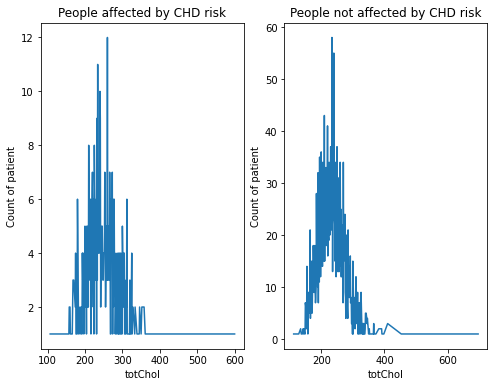

In [117]:
line_chart(df, 'totChol')

- Used two line graphs to see the trend of values of cholestrol among the people which are affected by CHD risk to the people which are not affected by CHD risk.
- people who are not affected by CHD shows a little lesser values of cholestrol to the one having the CHD risk.

### sysBP analysis

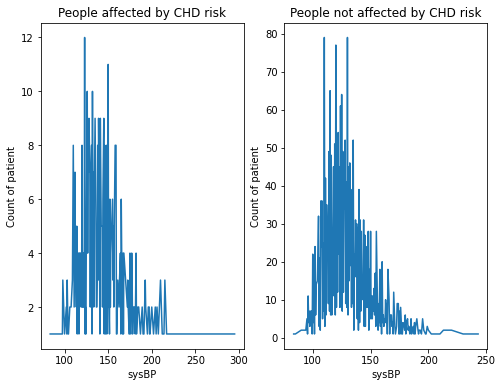

In [118]:
line_chart(df, 'sysBP')

- Used the line graphs to compare the trend of sysBP values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of sysBP.

### diaBP analysis

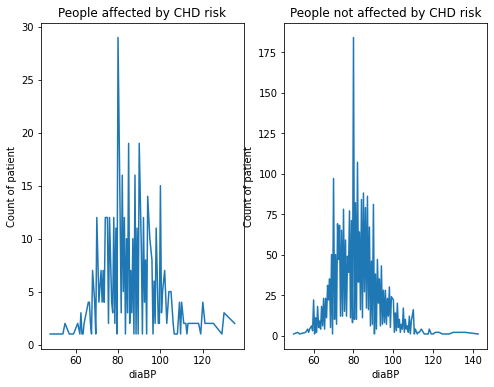

In [119]:
line_chart(df, 'diaBP')

- Used the line graphs to compare the trend of diaBP values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of diaBP.

### BMI analysis

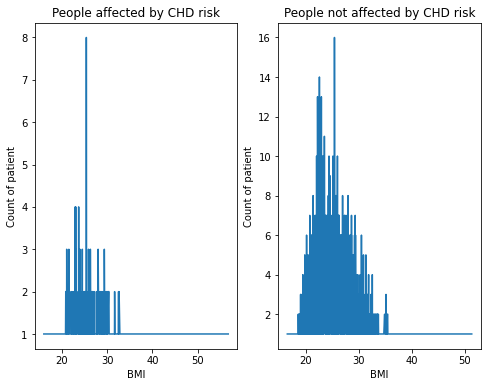

In [120]:
line_chart(df, 'BMI')

- Used the line graphs to compare the trend of BMI values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of BMI as compared to the people not having CHD risk.

### heartRate analysis

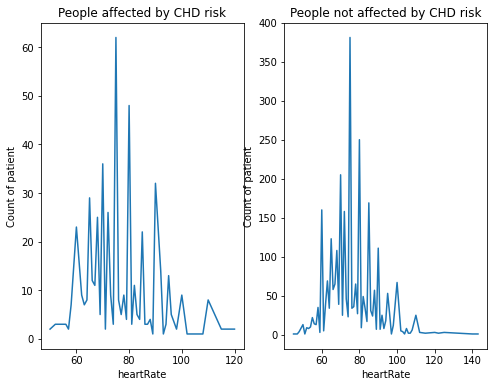

In [121]:
line_chart(df, 'heartRate')

- Used the line graphs to compare the trend of heart rate values of the people having CHD risk to the people who do not have CHD risk.
- The graph does not show any prominent insight through which we can differentiate the two groups.

### glucose analysis

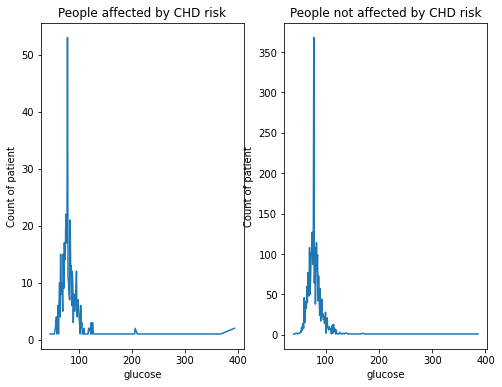

In [122]:
line_chart(df, 'glucose')

- Used the line graphs to compare the trend of glucose values of the people having CHD risk to the people who do not have CHD risk.
- The graph shows that people who have CHD risk have a little higher values of glucose.

### Correlation heatmap

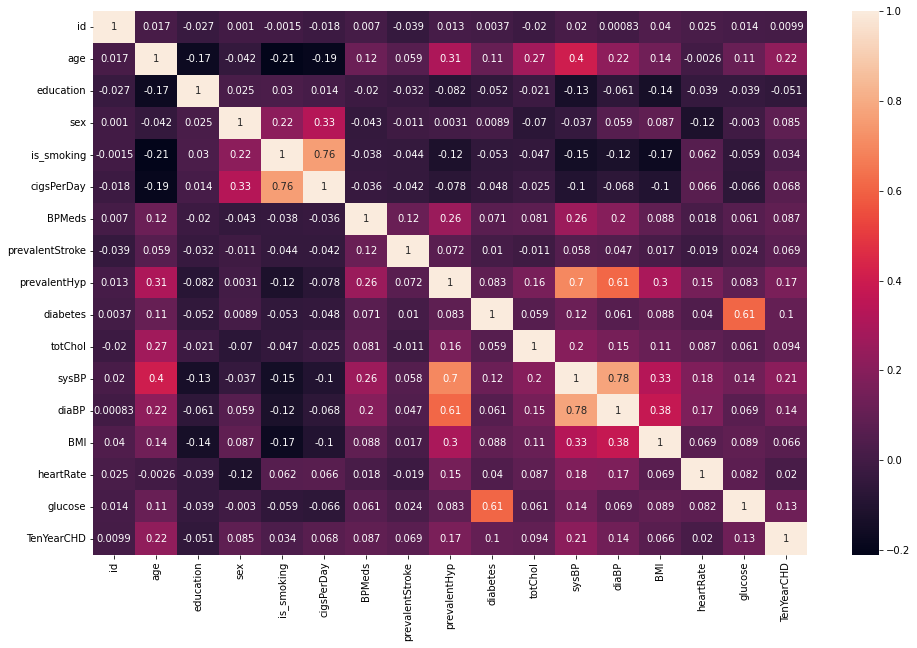

In [123]:
# plotting the correlation heatmap complete dataset
plt.figure(figsize = (16, 10))
correlation = df.corr()
sns.heatmap(correlation, annot= True)
plt.show()

- Used correlation heat map to see the correlation between the independent and dependent columns.
- The graph shows that 'age' is the column that shows most correlation. Education is the only column that is showing negative correlation with the dependent column.

## Why we haven't used the Dimensionality reduction?

Since, we are working on a problem which is associated with the medical background therefore we have not used methods like VIF (Variance Inflation Factor) to decrease the columns which shows multi collinearity.

Since multicollinearity doesn't affect the performance of the model and we want to gather as more information as possible to make the prediction better therefore we dropped the idea of removing columns.

Taking into consideration that we are working on patients' data therefore the more the information, the better it would be to predict the condition of the patient.

## Feature Engineering

### Handling Categorical Variables

In [35]:
# We just have two columns that holds textual data, namely sex and is_smoking.
# Therefore mapping these columns to make their values numerical as the model only understands the  numberical data.

df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

In [36]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### X-Y split

In [37]:
# Splitting the independent and dependent variables.

X = df[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
Y = df['TenYearCHD'].copy()

Scalling the data

### Robust Scaler

In [38]:
# Scaling the data
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_x = scaler.fit_transform(X)
robust_x = pd.DataFrame(robust_x, columns = X.columns)

# Before standardisation, we are using the robust scaler which uses the interquartile technique to remove the outliers.

### Standard Scaler

In [39]:
# Now, standardizing the data

scaler = preprocessing.StandardScaler()
standard_x = scaler.fit_transform(robust_x)
standard_x = pd.DataFrame(standard_x, columns = X.columns)# Now, standardizing the data

scaler = preprocessing.StandardScaler()
standard_x = scaler.fit_transform(robust_x)
standard_x = pd.DataFrame(standard_x, columns = X.columns)

Train test split

In [40]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( standard_x, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [41]:
x_train.shape, x_test.shape

((2373, 15), (1017, 15))

## Logistic Regression 

### Logistic Regression over imbalanced data

In [42]:
# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = True, max_iter = 10000)
# Fitting the model over the train data
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [43]:
# all the coefficients of the variables
lr.coef_

array([[ 0.5298742 , -0.03517674,  0.19366483,  0.08726132,  0.21257812,
         0.01042617,  0.07587743,  0.13238309,  0.00779328,  0.07719599,
         0.30148608, -0.05365189,  0.02131677, -0.04725102,  0.20024919]])

In [44]:
# Predicting over the train data and the test data
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
# checking the accuracy score of model over the train and test data
print(f'The accuracy score on train data is {accuracy_score(train_preds, y_train)}')
print(f'The accuracy score on test data is {accuracy_score(test_preds, y_test)}')

The accuracy score on train data is 0.8588284871470713
The accuracy score on test data is 0.8593903638151426


In [46]:
from sklearn.metrics import classification_report
print(classification_report(train_preds, y_train))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2336
           1       0.08      0.81      0.15        37

    accuracy                           0.86      2373
   macro avg       0.54      0.84      0.54      2373
weighted avg       0.98      0.86      0.91      2373



Looking at the report, we can see that on an average, we are getting 54% precision and 84% recall and 54% f1 score. As we are dealing with the data which is associated to medical purposes therefore our main focus would be to improve the recall since we are more concerned about finding the positive cases.

In [47]:
print(classification_report(test_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1001
           1       0.08      0.81      0.15        16

    accuracy                           0.86      1017
   macro avg       0.54      0.84      0.54      1017
weighted avg       0.98      0.86      0.91      1017



For the test data also using the logistic regression, although we are getting average precision of 54% but the average recall rate is 84% which is good as we are concerned with the disease risk. The average f1 score that we are getting is 54%.

In [48]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

roc_auc_score for train data:  0.5401624686360675
roc_auc_score for test data:  0.5407475490196078


We are not getting the desired results which we want. 

Since we know that the data is imbalanced, therefore let us first use the technique of SMOTE which will help us rectifying the problem of imbalanced data.

### Using SMOTE

Before using the SMOTE, let us understand how smote works. 

SMOTE (Synthetic Minority Oversampling Technique), this is one of the most common methods to solve the data imbalance problem.
It balances the class imbalance by randomly increasing minority class examples by replicating them.


In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, Y)

In [50]:
y_sm=pd.DataFrame(y_sm)

In [51]:
x_train, x_test, y_train, y_test = train_test_split( x_sm, y_sm, test_size = 0.3, random_state = 0, stratify = y_sm) 
lr = LogisticRegression(fit_intercept = True, max_iter = 10000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
train_preds = lr.predict(x_train)
test_preds = lr.predict(x_test)

In [53]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2018
           1       0.67      0.67      0.67      2012

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

roc_auc_score for train data:  0.671712158808933


Here we can see that while dealing with the train data, using the SMOTE has shown a sigificant change in the values.

Now, we are getting an average precision and recall of 68% as well as an f1 score of 68%. Although this is not the best model we can take but SMOTE technique has helped us remove the issue of imbalance in the result of different classes present.

In [54]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for train data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       851
           1       0.69      0.68      0.69       877

    accuracy                           0.69      1728
   macro avg       0.69      0.69      0.69      1728
weighted avg       0.69      0.69      0.69      1728

roc_auc_score for train data:  0.6857638888888888


Talking about the test data, the SMOTE helped us reach a value of 66% for precision, recall as well as f1 score.

Although these results are not acceptable since the metrics are really low therefore we'll be using further techniques to improve the result of the model.

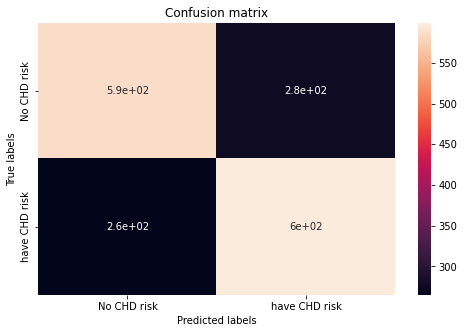

In [55]:
# Making confusion matrix for the test data

plt.figure(figsize = (8, 5))
labels = ['No CHD risk', 'have CHD risk']
cm = confusion_matrix(y_test, test_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

### Cross validation and hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [57]:
model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result=grid_search.fit(x_train, y_train)

In [58]:
grid_result.best_score_, grid_result.best_params_

(0.6755129716483425, {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'})

In [59]:
train_class_preds = grid_result.predict(x_train)
test_class_preds = grid_result.predict(x_test)

In [60]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2018
           1       0.67      0.67      0.67      2012

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

roc_auc_score for train data:  0.671712158808933


In [61]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for train data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       851
           1       0.69      0.68      0.69       877

    accuracy                           0.69      1728
   macro avg       0.69      0.69      0.69      1728
weighted avg       0.69      0.69      0.69      1728

roc_auc_score for train data:  0.6857638888888888


We also tried applying hyperparameter tuning over the model yet the results which we are getting are not acceptable and hence now we will use some other model for the prediction.

## KNN

In [62]:
# Importing the KNN model
# We will be using GridSearchCV for the hyperparameter tuning to get the best results from the model.
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
# Fitting the model on the train data
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
# Checking the best value for the hyperparameter.
knn_cv.best_params_

{'n_neighbors': 2}

In [64]:
# Using the best value for hyperparameter and then fitting the model using the train data.
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [65]:
# Making predictions for the train and test dataset.
train_preds_knn = knn.predict(x_train)
test_preds_knn = knn.predict(x_test)

In [66]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2018
           1       0.67      0.67      0.67      2012

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030

roc_auc_score for train data:  0.671712158808933


In [67]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       851
           1       0.69      0.68      0.69       877

    accuracy                           0.69      1728
   macro avg       0.69      0.69      0.69      1728
weighted avg       0.69      0.69      0.69      1728

roc_auc_score for test data:  0.6857638888888888


After analyzing the KNN model, we can see that it is not giving any better results than the logistic regression model and still the score we are getting is 66% for precision, recall as well as f1 score.

The value for roc_auc_score is 65% which is also not acceptable therefore now we'll use some better model like Random forest.

## Random Forest Classifier

In [79]:
# Importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Using the values obtained by the SMOTE technique to get train and test data.
x_train, x_test, y_train, y_test = train_test_split( x_sm, y_sm, test_size = 0.3, random_state = 0, stratify = y_sm)

In [80]:
# We are using GridSearchCV here also to get the best values for the hyperparameters

rf_clf = RandomForestClassifier()
grid = {'n_estimators':[50,100,150,200], 'max_depth':[3,5,7,9,12]}
grid_rf_clf = GridSearchCV(rf_clf, param_grid = grid, scoring = 'recall', cv=5)
grid_rf_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [81]:
# Cheking the values of best parameters
print(grid_rf_clf.best_params_)

{'max_depth': 12, 'n_estimators': 150}


Since the values which we are getting are the corner values which we provided to the grid search therefore we will again provide a set of values as there are chances that the best values may further increase or decrease.

In [82]:
rf_clf = RandomForestClassifier()
grid = {'n_estimators':[20,30,40,50,60,70], 'max_depth':[9,12,15,18,20]}
grid_rf_clf = GridSearchCV(rf_clf, param_grid = grid, scoring = 'recall', cv=5)
grid_rf_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 12, 15, 18, 20],
                         'n_estimators': [20, 30, 40, 50, 60, 70]},
             scoring='recall')

In [83]:
print(grid_rf_clf.best_params_)

{'max_depth': 20, 'n_estimators': 70}


Here, the values which we are getting are not margin values and lies inside the set provided to grid search therefore we will predict using these values and let's see what result do we get.

In [84]:
train_preds = grid_rf_clf.predict(x_train)
test_preds = grid_rf_clf.predict(x_test)

In [85]:
print(classification_report(train_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2015
           1       1.00      1.00      1.00      2015

    accuracy                           1.00      4030
   macro avg       1.00      1.00      1.00      4030
weighted avg       1.00      1.00      1.00      4030

roc_auc_score for train data:  1.0


In [86]:
print(classification_report(test_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       890
           1       0.89      0.92      0.90       838

    accuracy                           0.90      1728
   macro avg       0.90      0.90      0.90      1728
weighted avg       0.90      0.90      0.90      1728

roc_auc_score for test data:  0.9027777777777777


After watching the performance of the model over the train and test data. Although it may look like that the model is overfitting but looking at the results of the test dataset, we can conclude that the model is not overfitting and we can accept this model.

We are getting a score of 89% for the precision, recall and f1 score which is the best till now. Also we have used the method of cross validation because of which we can say that the model is not over fitted.

Since we are getting a good result with this model therefore now we will try some boosting algorithm to see if we can improve the result further or not.

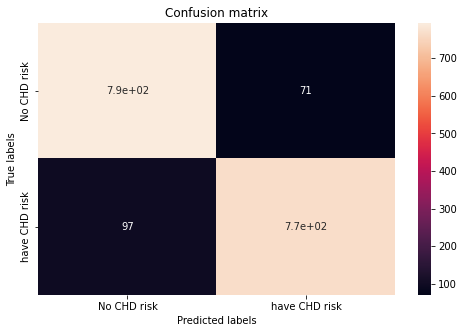

In [87]:
# Making confusion matrix for the test data

plt.figure(figsize = (8, 5))
labels = ['No CHD risk', 'have CHD risk']
cm = confusion_matrix(y_test, test_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

## XGBoost

XGBoost basically stands for Extreme Gradient Boosting. It is an ensemble boosting algorithm which works on the weightage given to the different variables present in the dataset.

Basically, Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model.

In [68]:
# Importing XGBoost classifier
from xgboost import XGBClassifier
xg_model = XGBClassifier()
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}

xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

In [ ]:
# fitting the model over the train dataset. Here also we are using gridsearch to obtain the best results.
xg_grid1=xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

In [ ]:
print(xg_grid.best_score_, xg_grid.best_params_)

0.852605459057072 {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


The best parameters that we are getting are the margin values and the best values still may be lesser or greater therefore we will again use a set of values to find the best possible value for the hyperparameters.

In [ ]:
param_dict = {'n_estimators' : [100,120,140],
              'max_depth' : [11,12,14,16],
              'min_samples_split' : [20,30,40,50],
              'min_samples_leaf' : [10,15,20,25]}

xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

xg_grid1=xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=120; total time=   1.2s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=120; total time=   1.1s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=120; total time=   1.1s
[CV] END max_depth=11, min_samples_leaf=10, min_samples_split=20, n_estimators=120; total time=   1.1s
[CV] END m

In [ ]:
print(xg_grid.best_score_, xg_grid.best_params_)

0.8665012406947892 {'max_depth': 16, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 140}


Here again the values which we are getting are the margin values and we need to shift the set of values according to that.

In [69]:
param_dict = {'n_estimators' : [130,140,150,160],
              'max_depth' : [10,12,14,16],
              'min_samples_split' : [5,10,15,20],
              'min_samples_leaf' : [5,7,9,10,12]}

xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

xg_grid1=xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=130; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=140; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=140; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=140; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=140; total time=   1.2s
[CV] END max_depth=10, min_

In [70]:
print(xg_grid.best_score_, xg_grid.best_params_)

0.8605459057071961 {'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 160}


In [71]:
param_dict = {'n_estimators' : [160,180,200,220],
              'max_depth' : [16,18,20,22],
              'min_samples_split' : [1,2,3,4,5],
              'min_samples_leaf' : [1,2,3,4,5]}

xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='recall')

xg_grid1=xg_grid.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=160; total time=   4.8s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=160; total time=   3.6s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=160; total time=   3.7s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=160; total time=   2.3s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=160; total time=   1.9s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=180; total time=   2.1s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=180; total time=   2.1s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=180; total time=   2.1s
[CV] END max_depth=16, min_samples_leaf=1, min_samples_split=1, n_estimators=180; total time=   2.0s
[CV] END max_depth=16, min_

In [73]:
print(xg_grid.best_score_, xg_grid.best_params_)

0.8635235732009925 {'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 180}


In [74]:
train_class_preds = xg_grid1.predict(x_train)
test_class_preds = xg_grid1.predict(x_test)

In [76]:
print(classification_report(train_class_preds, y_train))
print('roc_auc_score for train data: ', roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2015
           1       1.00      1.00      1.00      2015

    accuracy                           1.00      4030
   macro avg       1.00      1.00      1.00      4030
weighted avg       1.00      1.00      1.00      4030

roc_auc_score for train data:  1.0


In [77]:
print(classification_report(test_class_preds, y_test))
print('roc_auc_score for test data: ', roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       929
           1       0.86      0.93      0.89       799

    accuracy                           0.90      1728
   macro avg       0.90      0.90      0.90      1728
weighted avg       0.90      0.90      0.90      1728

roc_auc_score for test data:  0.8975694444444445


Finally we are getting an average precision of 90%, recall of 90% as well as f1 score of 90%. The roc auc score for the XGBoost model is 89%. 

We will conclude with this model since the recall for the positive class is 93%, which is quite acceptable.

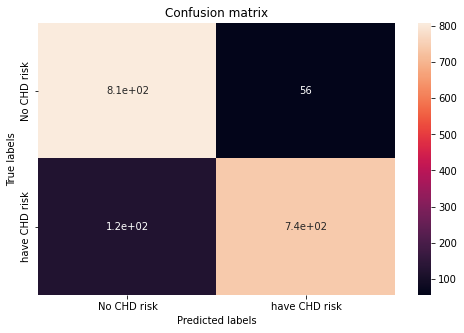

In [78]:
# Making confusion matrix for the test data

plt.figure(figsize = (8, 5))
labels = ['No CHD risk', 'have CHD risk']
cm = confusion_matrix(y_test, test_class_preds)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

# **Summary/Conclusion**

After performing the analysis and using multiple models to predict the result, we have come across the following conclusions: 

- Out of all the patients only 15.1% patients have the risk of CHD.
- Analyzing the age of the patients, patients aged 35 to 70 face the risk of CHD. Analyzing the data with respect to sex shows us that both males and females are equally at risk of CHD despite the age factor.
- Analyzing the sex factor shows us that although more female patients are there, the number of patients affected by CHD is higher among males.
- Talking about education, we found that the number of patients decreases as the education level increases. The knowledge about having a healthy lifestyle can be the reason behind this.
- Among the patients, the ratio of people who smoke and do not smoke is 50-50. Also analyzing the patients with risk shows that smoking does not have any prominent effect on the CHD risk.
- Although the count of cigarettes that people consume varies highly, a prominent number of people prefer to take 20 cigarettes per day.
- Analyzing the column of BPMeds shows us that although BP medicines do not show any visible effect on the CHD risk but columns like prevalent stroke, hypertension, and diabetes show that they affect the CHD risk up to an extent.
- Talking about total cholesterol, sysBP, and diaBP they all show an increased trend in the values for those who are affected by the CHD risk.
- The same trend is shown by the columns like BMI, heart rate, and glucose.
- Finally analyzing the correlation heat map, we can see that age, hypertension, diabetes, sysBP, diaBP, and glucose are some of the most prominent variables contributing to the value of the dependent column.
- The only column that shows a negative correlation with the dependent column is the education column as we have seen above as well.

<h4> ML models

Starting with the machine learning models, first we tried the simplest classification model which is the logistic regression.
- While working with the default data the best result we got over the test data was 54% precision, 84% recall, and 54% f1 score. Although the value of recall was good yet the result is not acceptable.
- Since we know that our data is imbalanced in terms of positive and negative class, therefore we will use SMOTE technique to make the data balanced.
- After using SMOTE, the result that we obtained was 69% for precision, recall, and f1 score as well.
- We also tried using hyperparameter tuning after using SMOTE yet no increment was seen in the result.
- Using the KNN k-nearest neighbor classifier also showed the same result and no degradation was seen in the result.
- Using the random forest classifier gave us some better results as after multiple iterations of hyperparameter tuning we obtained the precision, recall, and f1 score of 89% which is a good increment in result values.
- Finally concluding the project we tried a boosting algorithm, i.e., tried XGBoost which is the Extreme Gradient Boosting algorithm, after performing multiple iterations of hyperparameter tuning over the XGBoost, the best result we obtained was 90% for precision, recall as well as f1 score, although the recall for positive class is 93%.
- With this score, we will conclude this project. To increase the result of the model, we need to train the model on more data.
- Also, since we were dealing with medical data, our main aim was to increment the recall since we want to spot as many positive class as possible.